## Анализ клиентской оттока и разработка стратегии удержания клиентов.

##### Анализ клиентской оттока и разработка стратегии удержания клиентов - это процесс использования данных о клиентах компании для определения, почему клиенты уходят (отток), и разработки методов удержания, чтобы уменьшить этот отток.


#### Описания данных

##### Признаки


1. **customerID**: Уникальный идентификатор клиента.
2. **gender**: Пол клиента (мужчина или женщина).
3. **SeniorCitizen**: Показатель, указывающий, является ли клиент пенсионером (1) или нет (0).
4. **Partner**: Показатель, указывающий, имеет ли клиент партнера (Да или Нет).
5. **Dependents**: Показатель, указывающий, есть ли у клиента иждивенцы (Да или Нет).
6. **tenure**: Количество месяцев, в течение которых клиент является абонентом услуг компании.
7. **PhoneService**: Показатель, указывающий, подключена ли услуга телефонной связи (Да или Нет).
8. **MultipleLines**: Показатель, указывающий, подключены ли несколько линий телефонной связи (Да, Нет или Нет телефонной связи).
9. **InternetService**: Тип интернет-соединения клиента (DSL, Fiber optic или No).
10. **OnlineSecurity**: Показатель, указывающий, подключена ли услуга онлайн-безопасности (Да, Нет или Нет интернета).
11. **OnlineBackup**: Показатель, указывающий, подключена ли услуга онлайн-резервного копирования (Да, Нет или Нет интернета).
12. **DeviceProtection**: Показатель, указывающий, подключена ли услуга защиты устройства (Да, Нет или Нет интернета).
13. **TechSupport**: Показатель, указывающий, подключена ли услуга технической поддержки (Да, Нет или Нет интернета).
14. **StreamingTV**: Показатель, указывающий, подключена ли услуга потокового телевидения (Да, Нет или Нет интернета).
15. **StreamingMovies**: Показатель, указывающий, подключена ли услуга потоковых фильмов (Да, Нет или Нет интернета).
16. **Contract**: Тип контракта клиента (Month-to-month, One year или Two year).
17. **PaperlessBilling**: Показатель, указывающий, использует ли клиент безбумажный биллинг (Да или Нет).
18. **PaymentMethod**: Способ оплаты услуг (Electronic check, Mailed check, Bank transfer (automatic) или Credit card (automatic)).
19. **MonthlyCharges**: Ежемесячная плата клиента за услуги.
20. **TotalCharges**: Общая сумма, оплаченная клиентом за услуги на момент выгрузки данных.
21. **Churn**: Показатель, указывающий, ушел ли клиент (Да или Нет).

### Подключение необходимых библиотек

In [1]:
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

from sklearn.model_selection import GridSearchCV as gscv

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import numpy as np

## 1. Подготовка данных

##### Рассмотрим csv файл Telco-Customer-Churn

In [2]:
customers = pd.read_csv('dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')
customers.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7041 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Видим пропуски в столбце SeniorCitizen.

In [4]:
customers.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0.0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0.0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0.0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0.0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [24]:
# Приведём столбцы к нижнему регистру:
customers.columns = customers.columns.str.lower()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7041 non-null   float64
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


<Axes: >

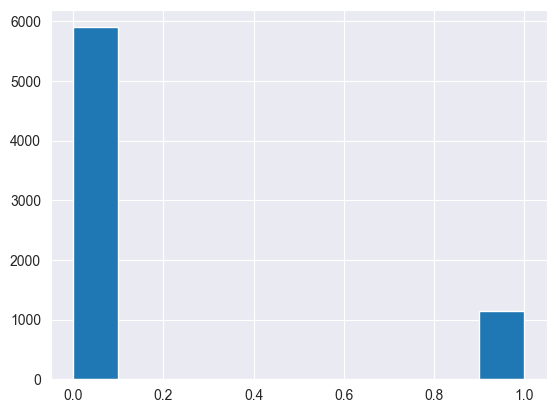

In [25]:
# Посмотрим на гистограмму столбца SeniorCitizen:
customers['seniorcitizen'].hist()

In [26]:
# Заполним пропуски нулями
customers.loc[:, 'seniorcitizen'].fillna(0, inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   float64
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


<Axes: >

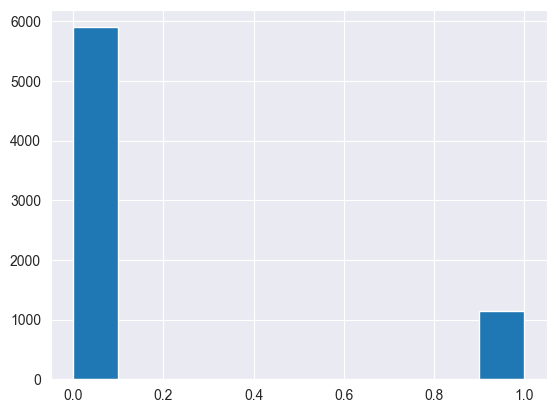

In [27]:
customers['seniorcitizen'].hist()

In [29]:
customers.drop(['customerid'], axis=0, inplace=True)
customers.info()

KeyError: "['customerid'] not found in axis"